In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
from pathlib import Path
path = Path('/content/gdrive/My Drive/Assessments/Eluvio/')
import os
os.listdir(path)

['dataset_car_logo-20220209T181113Z-001.zip', 'dataset_car_logo']

In [ ]:
from zipfile import ZipFile
with ZipFile('/content/gdrive/My Drive/Assessments/Eluvio/dataset_car_logo-20220209T181113Z-001.zip', 'r') as zipref:
  zipref.extractall('/content/gdrive/My Drive/Assessments/Eluvio/')

In [3]:
train = Path('/content/gdrive/My Drive/Assessments/Eluvio/dataset_car_logo/Train')
test = Path('/content/gdrive/My Drive/Assessments/Eluvio/dataset_car_logo/Test')

In [4]:
print(f'Length of Train Set : {len(os.listdir(train))}')
print(f'Length of Test Set : {len(os.listdir(test))}')

Length of Train Set : 18
Length of Test Set : 18


In [5]:
assert sorted(os.listdir(train)) == sorted(os.listdir(test)), 'Classes in Train and Test set are not the same'

In [6]:
print(f'Unique Classes in Train and Test Set :')
os.listdir(train)

Unique Classes in Train and Test Set :


['Porsche',
 'Ford',
 'Lexus',
 'Acura',
 'MercedesBenz',
 'Mazda',
 'Hyundai',
 'BMW',
 'Volkswagen',
 'Toyota',
 'Honda',
 'Audi',
 'Nissan',
 'Tesla',
 'Chevrolet',
 'Infiniti',
 'Lamborghini',
 'KIA']

In [7]:
print(len(os.listdir(str(train) + '/Porsche')))

50


In [8]:
!git clone https://github.com/fastai/fastai
!pip install -e "fastai[dev]"

fatal: destination path 'fastai' already exists and is not an empty directory.
Obtaining file:///content/fastai
  Attempting uninstall: fastai
    Found existing installation: fastai 2.5.4
    Can't uninstall 'fastai'. No files were found to uninstall.
  Running setup.py develop for fastai


In [9]:
from fastai.vision.all import *

In [10]:
item_tfms = RandomResizedCrop(460, min_scale=0.75, ratio=(1.,1.))
batch_tfms = [*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
bs=8

In [20]:
path = Path('/content/gdrive/My Drive/Assessments/Eluvio/dataset_car_logo')
dls = ImageDataLoaders.from_folder(path, train = 'Train', valid = 'Test', seed = 786, shuffle = True, item_tfms = item_tfms, batch_tfms = batch_tfms, bs = bs)

In [21]:
dls.train_ds.items[:5]

[Path('/content/gdrive/My Drive/Assessments/Eluvio/dataset_car_logo/Train/Porsche/29.png'),
 Path('/content/gdrive/My Drive/Assessments/Eluvio/dataset_car_logo/Train/Porsche/41.png'),
 Path('/content/gdrive/My Drive/Assessments/Eluvio/dataset_car_logo/Train/Porsche/14.jpg'),
 Path('/content/gdrive/My Drive/Assessments/Eluvio/dataset_car_logo/Train/Porsche/28.jpg'),
 Path('/content/gdrive/My Drive/Assessments/Eluvio/dataset_car_logo/Train/Porsche/22.png')]

In [22]:
len(dls.train_ds.items)

899

In [23]:
dls.valid_ds.items[:5]

[Path('/content/gdrive/My Drive/Assessments/Eluvio/dataset_car_logo/Test/MercedesBenz/1.png'),
 Path('/content/gdrive/My Drive/Assessments/Eluvio/dataset_car_logo/Test/MercedesBenz/2.png'),
 Path('/content/gdrive/My Drive/Assessments/Eluvio/dataset_car_logo/Test/MercedesBenz/3.png'),
 Path('/content/gdrive/My Drive/Assessments/Eluvio/dataset_car_logo/Test/MercedesBenz/0.jpg'),
 Path('/content/gdrive/My Drive/Assessments/Eluvio/dataset_car_logo/Test/MercedesBenz/4.png')]

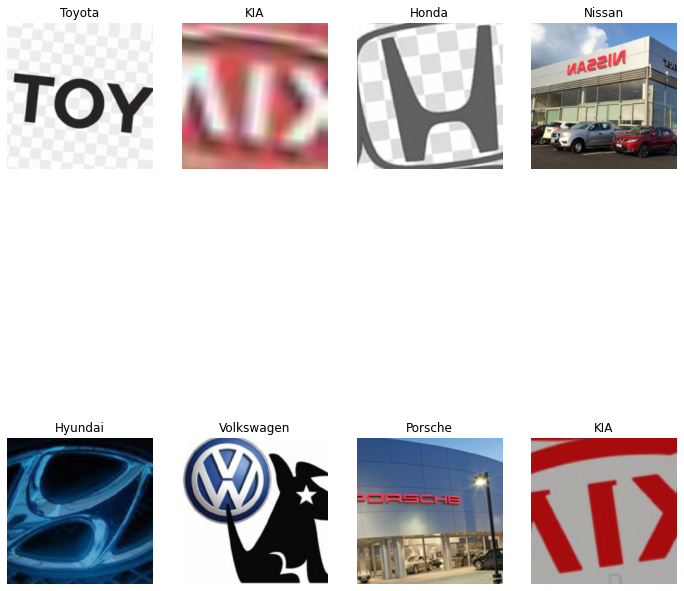

In [24]:
dls.show_batch(max_n=9, figsize=(12,14))

In [25]:
dls.vocab

['Acura', 'Audi', 'BMW', 'Chevrolet', 'Ford', 'Honda', 'Hyundai', 'Infiniti', 'KIA', 'Lamborghini', 'Lexus', 'Mazda', 'MercedesBenz', 'Nissan', 'Porsche', 'Tesla', 'Toyota', 'Volkswagen']

In [26]:
learn = cnn_learner(dls, resnet34, pretrained=True, metrics=[accuracy]).to_fp16()

In [27]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,2.637497,2.494184,0.352381,00:58


SuggestedLRs(valley=0.0008317637839354575)

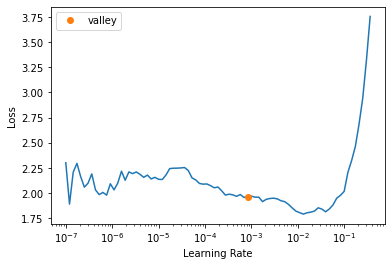

In [28]:
learn.lr_find()

In [30]:
learn.unfreeze()
learn.fit_one_cycle(4, lr_max=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.601333,3.174481,0.361905,00:42
1,1.241055,2.409969,0.419048,00:40
2,0.849844,2.544102,0.495238,00:42
3,0.483608,2.401907,0.495238,00:41


In [31]:
learn.unfreeze()
learn.fit_one_cycle(15, lr_max=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.371297,2.156502,0.552381,00:43
1,0.538990,2.961180,0.476190,00:42
2,0.918360,4.511729,0.352381,00:41
3,1.075414,5.147389,0.342857,00:41
4,0.754943,3.298474,0.428571,00:41
5,0.699865,2.595524,0.495238,00:40
6,0.591120,2.510514,0.466667,00:42
7,0.537096,2.855682,0.447619,00:42
8,0.386691,2.580821,0.533333,00:41
9,0.308540,2.512267,0.542857,00:41


In [46]:
clas, clas_idx, probs = learn.predict('/content/gdrive/My Drive/Assessments/Eluvio/audi-logo.jpg'); clas

'Audi'